# Lunar Lander 
#### RL Project

- Valentina Blasone
- Giulia Marchiori Pietrosanti

In [54]:
from utils import discretize_space_uniform, moving_avg, policy_visualization_dqn
import Models.Random as Random
import Models.Sarsa as Sarsa
import Models.Q_learning as Q_learning
import Models.Q_learning_ANN as Q_ann
import Models.DQN as DQN

import matplotlib
import matplotlib.pyplot as plt
import torch
import numpy as np
import gym
env = gym.make("LunarLander-v2")

font = {'size': 16}
matplotlib.rc('font', **font)

In [2]:
episodes = 2000

### Random algorithm

In [3]:
# Random
env = gym.make("LunarLander-v2")
rew_random = Random.random(env, episodes)
mean_rew_random = moving_avg(rew_random, window=100)

# Sarsa and Q-learning with discretization

### Discretization

In [4]:
n_bins = (6, 4, 4, 4, 4, 4, 2, 2)

x_space = discretize_space_uniform(-1.5, 1.5, n_bins[0])
y_space = discretize_space_uniform(0, 2, n_bins[1])
vx_space = discretize_space_uniform(-2, 2, n_bins[2])
vy_space = discretize_space_uniform(-2, 0.5, n_bins[3])
theta_space = discretize_space_uniform(-3, 3, n_bins[4])
omega_space = discretize_space_uniform(-1, 1, n_bins[5])

discretization = [x_space, y_space, vx_space, vy_space, theta_space, omega_space]

In [5]:
alpha = 0.01
gamma = 0.99

# Sarsa
env = gym.make("LunarLander-v2")
rew_sarsa = Sarsa.sarsa(env, discretization, alpha, gamma, episodes)
mean_rew_sarsa = moving_avg(rew_sarsa, window=100)

# Q-learning
env = gym.make("LunarLander-v2")
rew_ql = Q_learning.q_learning(env, discretization, alpha, gamma, episodes)
mean_rew_ql = moving_avg(rew_ql, window=100)

Episode 1999	Average Reward: -55.39

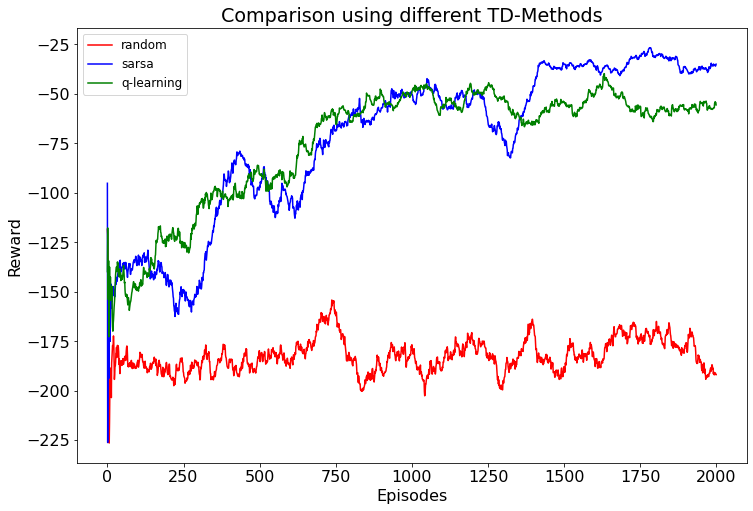

In [42]:
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(mean_rew_random, color="red", label="random")
plt.plot(mean_rew_sarsa, color="blue", label="sarsa")
plt.plot(mean_rew_ql, color="green", label="q-learning")
plt.title("Comparison using different TD-Methods")
plt.xlabel("Episodes")
plt.ylabel("Reward")
plt.legend(loc=2, prop={'size': 12})
plt.show()

# Q-learning with function approximation

In [7]:
# Q-learning with value approximation
env = gym.make("LunarLander-v2")
rew_ql_ann = Q_ann.q_learning_ANN(env, 8, episodes)
mean_rew_ann = moving_avg(rew_ql_ann, window=100)

Episode 0	Average Reward: -77.85
Episode 100	Average Reward: -156.22
Episode 200	Average Reward: -148.40
Episode 300	Average Reward: -161.88
Episode 400	Average Reward: -157.46
Episode 500	Average Reward: -137.79
Episode 600	Average Reward: -151.06
Episode 700	Average Reward: -143.50
Episode 800	Average Reward: -137.02
Episode 900	Average Reward: -142.63
Episode 1000	Average Reward: -140.82
Episode 1100	Average Reward: -144.53
Episode 1200	Average Reward: -148.15
Episode 1300	Average Reward: -135.84
Episode 1400	Average Reward: -139.31
Episode 1500	Average Reward: -134.26
Episode 1600	Average Reward: -150.36
Episode 1700	Average Reward: -141.34
Episode 1800	Average Reward: -149.11
Episode 1900	Average Reward: -133.20
Episode 1999	Average Reward: -132.36

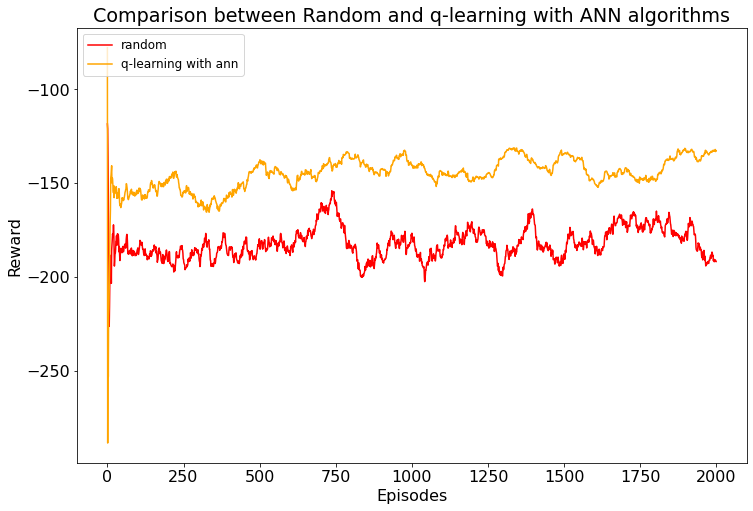

In [43]:
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(mean_rew_random, color="red", label="random")
plt.plot(mean_rew_ann, color="orange", label="q-learning with ann")
plt.title("Comparison between Random and q-learning with ANN algorithms")
plt.xlabel("Episodes")
plt.ylabel("Reward")
plt.legend(loc=2, prop={'size': 12})
plt.show()

# DQN

In [9]:
# DQN
env = gym.make("LunarLander-v2")
rew_dqn = DQN.dqn(env, 8, episodes)
mean_rew_dqn = moving_avg(rew_dqn, window=100)

Episode 0	Average Reward: -177.60
Episode 100	Average Reward: -141.11
Episode 200	Average Reward: -49.867
Episode 300	Average Reward: -40.63
Episode 400	Average Reward: 23.888
Episode 500	Average Reward: 103.78
Episode 583	Average Reward: 200.87
Environment solved in 483 episodes!	Average Score: 200.87
Episode 600	Average Reward: 204.79
Episode 700	Average Reward: 215.14
Episode 800	Average Reward: 202.40
Episode 900	Average Reward: 191.23
Episode 1000	Average Reward: 202.47
Episode 1100	Average Reward: 223.26
Episode 1200	Average Reward: 236.17
Episode 1300	Average Reward: 244.08
Episode 1400	Average Reward: 258.37
Episode 1500	Average Reward: 252.12
Episode 1600	Average Reward: 223.99
Episode 1700	Average Reward: 239.41
Episode 1800	Average Reward: 241.02
Episode 1900	Average Reward: 225.42
Episode 1999	Average Reward: 248.19

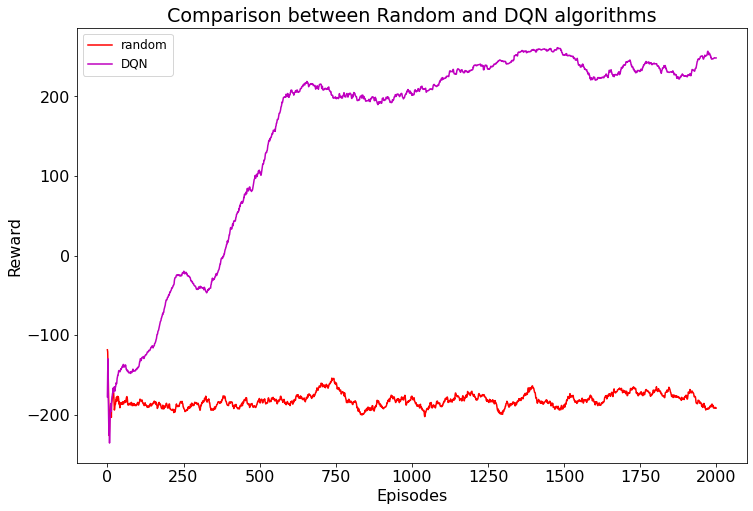

In [44]:
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(mean_rew_random, color="red", label="random")
plt.plot(mean_rew_dqn, color="m", label="DQN")
plt.title("Comparison between Random and DQN algorithms")
plt.xlabel("Episodes")
plt.ylabel("Reward")
plt.legend(loc=2, prop={'size': 12})
plt.show()

# Plot with all the used methods

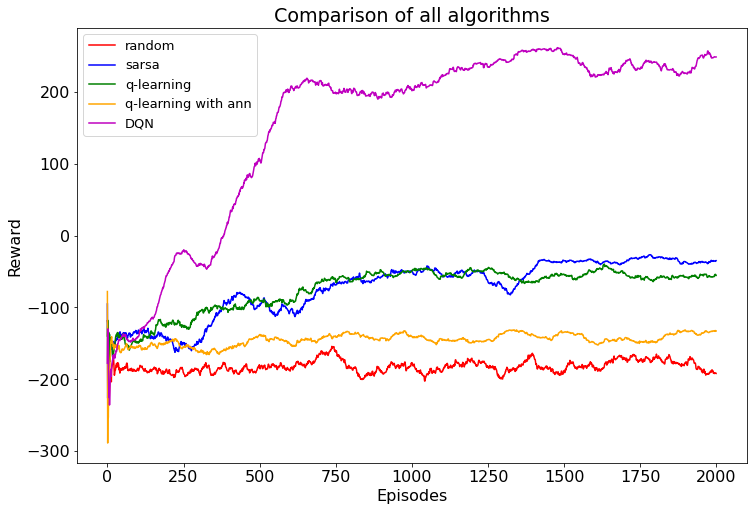

In [45]:
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(mean_rew_random, color="red", label="random")
plt.plot(mean_rew_sarsa, color="blue", label="sarsa")
plt.plot(mean_rew_ql, color="green", label="q-learning")
plt.plot(mean_rew_ann, color="orange", label="q-learning with ann")
plt.plot(mean_rew_dqn, color="m", label="DQN")
plt.xlabel("Episodes")
plt.ylabel("Reward")
plt.title("Comparison of all algorithms")
plt.legend(loc=2, prop={'size': 13})
plt.show()

# Save the results

In [ ]:
np.savetxt('Results/rew_random.csv', rew_random)
np.savetxt('Results/rew_sarsa.csv', rew_sarsa)
np.savetxt('Results/rew_ql.csv', rew_ql)
np.savetxt('Results/rew_ql_ann.csv', rew_ql_ann)
np.savetxt('Results/rew_dqn.csv', rew_dqn)

# Policy visualization
### Can we interpret the optimal policy?

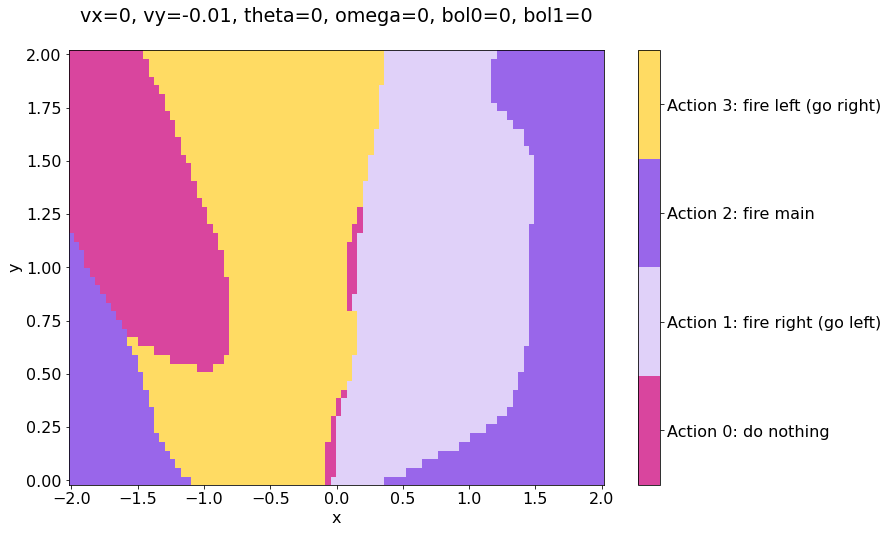

In [55]:
# fixed states
vx = 0      # vx in (-2, 2)
vy = -0.01   # vy in (-2, 0.5)
theta = 0   # theta in (-3, 3)
omega = 0   # omega in (-1, 1)
bol0 = 0    # bol0 in {0,1}
bol1 = 0    # bol1 in {0,1}

# varying states
x_grid = np.linspace(-2, 2, 100)
y_grid = np.linspace(0, 2, 50)

qnet = DQN.QNet(state_size=8, action_size=4, seed=0)
qnet.load_state_dict(torch.load("checkpoint_DQN.pth"))

policy_visualization_dqn(qnet, vx, vy, theta, omega, bol0, bol1, x_grid, y_grid)